In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, random_split

In [ ]:
def getDevice():
  if torch.cuda.is_available():
    return torch.device("cuda")
  elif torch.mps.is_available():
    return torch.device("mps")
  return torch.device("cpu")

device = getDevice()
device

device(type='cpu')

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
train_data = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [ ]:
img = np.asarray(train_data, dtype=object)
img.shape

(50000, 2)

In [ ]:
img[10][0][0].shape

torch.Size([32, 32])

In [ ]:
img[0][0].shape, img[10].shape

(torch.Size([3, 32, 32]), (2,))

# ⭐ Understanding the `*` Operator in Python

The `*` operator in Python has multiple uses depending on the context in which it is used.

---

## 🔹 1. **Multiplication (Arithmetic Operator)**
The `*` operator is commonly used for multiplication in numerical operations.

```python
result = 5 * 3  # 15
```

## 🔹 2. **Unpacking in Function Arguments**
When used in function arguments, * unpacks an iterable into separate values.

```python
def add(a, b, c):
    return a + b + c

nums = [1, 2, 3]
print(add(*nums))  # Equivalent to add(1, 2, 3)
```
## 🔹 **3. Repetition in Sequences**
The * operator can be used to repeat lists, tuples, or strings.
```python
print("Hello " * 3)  # "Hello Hello Hello"
print([1, 2] * 3)  # [1, 2, 1, 2, 1, 2]
```

## 🔹 **4. Capturing Multiple Arguments (*args)**
Inside a function, *args allows capturing a variable number of arguments as a tuple.
```python
def print_numbers(*args):
    print(args)

print_numbers(1, 2, 3, 4)  # Output: (1, 2, 3, 4)
```

## 🔹 **5. Unpacking in Assignments**
The * operator can be used to unpack elements into variables.
```python
a, *b, c = [1, 2, 3, 4, 5]
print(a)  # 1
print(b)  # [2, 3, 4]
print(c)  # 5
```

## 🔹 **6. Merging Lists Using ***
```python
list1 = [1, 2, 3]
list2 = [4, 5, 6]

merged_list = [*list1, *list2]
print(merged_list)  # [1, 2, 3, 4, 5, 6]
```

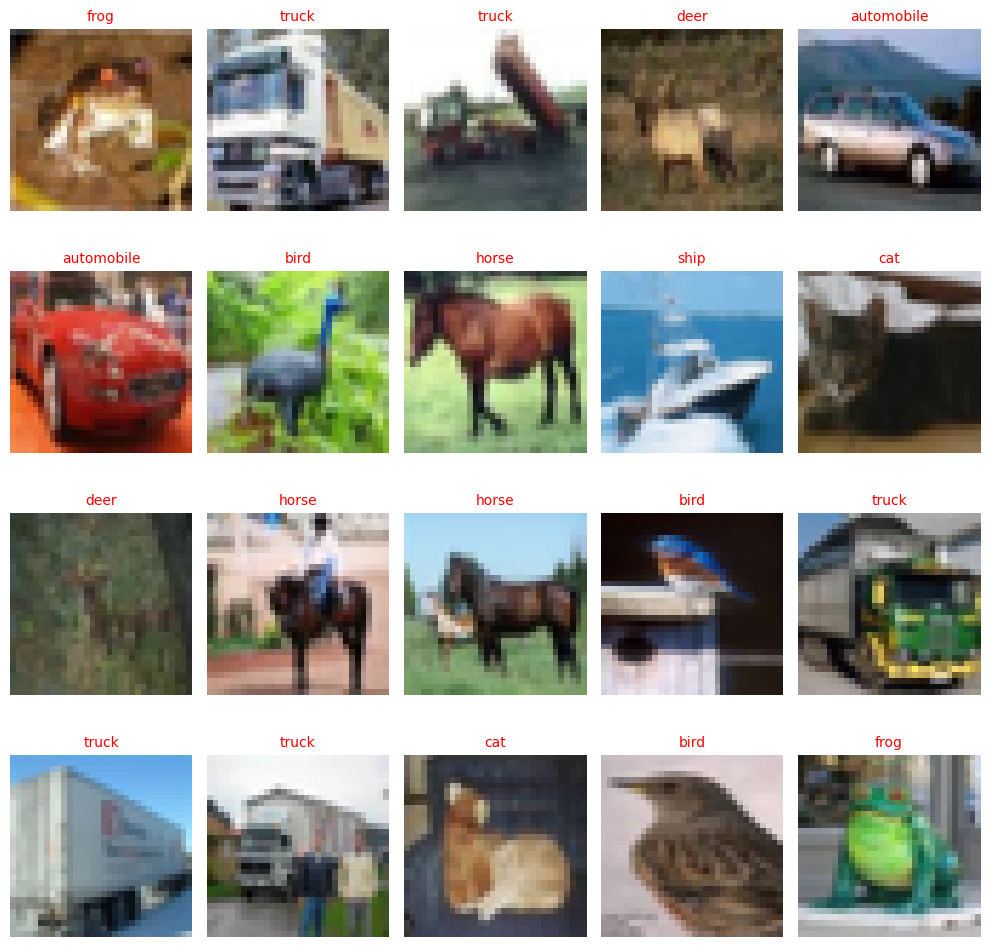

In [ ]:
row, col = 4, 5

img = [train_data[i] for i in range(row*col)]
images, labels = zip(*img)
classes = train_data.classes        # it contains the classname provided by the torch files

fig, ax = plt.subplots(row, col, figsize=(10, 10))

for i in range(row):
    for j in range(col):
        idx = i*col + j

        ax[i][j].imshow(images[idx].permute(1, 2, 0))  # Convert (C, H, W) to (H, W, C)
        ax[i][j].set_title(classes[labels[idx]], fontsize=10, color='red')  # Set title with class name
        ax[i][j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image

class CifarDataset(Dataset):
  def __init__(self, imgs, labels, transform=None):
    super(CifarDataset, self).__init__()
    self.images = imgs
    self.labels = labels
    self.transform = transform

  def __len__(self):
    return len(self.images)

  def __getitem__(self, index):
    image = self.images[index]
    label = self.labels[index]

    # if isinstance(image, torch.Tensor):
    #   image = image.numpy()
    # image = image.transpose(1, 2, 0)  # Permute if necessary
    # image = (image * 255).astype(np.uint8)
    # image = Image.fromarray(image)

    if self.transform:
      image = self.transform(image)

    return image, label

In [ ]:
# for testing
# Sample Data (100 images of shape (3, 32, 32))
test_images = torch.randn(100, 3, 32, 32)  # Simulated dataset
test_labels = torch.randint(0, 10, (100,))  # Random labels (0 to 9)

# Define Transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Flip image
    transforms.ToTensor(),  # Convert back to tensor
])

# Create Dataset
test_dataset = CifarDataset(test_images, test_labels, transform=transform)

# Access a Sample
img, label = test_dataset[0]
print(type(img), '\t\t', label)  # Output: <class 'torch.Tensor'> label_value

In [ ]:
idx_labels = train_data.class_to_idx

train_dataset = CifarDataset(train_data, idx_labels)
test_dataset = CifarDataset(test_data, idx_labels)

In [ ]:
len(train_dataset), len(test_dataset), len(train_loader), len(test_loader)

(50000, 10000, 782, 157)

In [ ]:
train_dataset.labels

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

Img Data -  torch.Size([3, 32, 32])
Label -  9


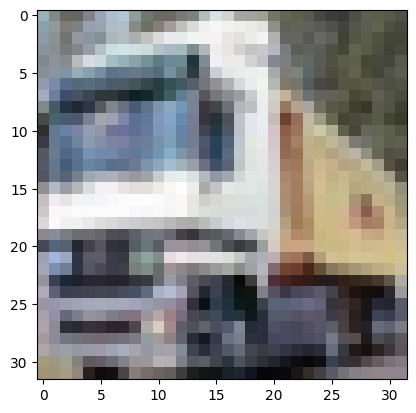

In [ ]:
# this is how we will do the training so data is prepared
print('Img Data - ',train_dataset.images[1][0].shape)
print('Label - ',  train_dataset.images[1][1])
plt.imshow(train_dataset.images[1][0].numpy().transpose(1, 2, 0))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    
